# To Explore Decision Tree Algorithm

Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

## TASK

**For the ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will import Scikit Learn library as and when required during the task. Let us now load the famous 'iris' dataset which is available in both seaborn and scikit learn libraries.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# getting some more information on our dataset 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis

Note: The following exploratory data analysis is not a part of the given task. I have done this for better understanding of the data set which will in turn help in better understanding of the decision tree.

In [5]:
# obtaining a statistical description of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


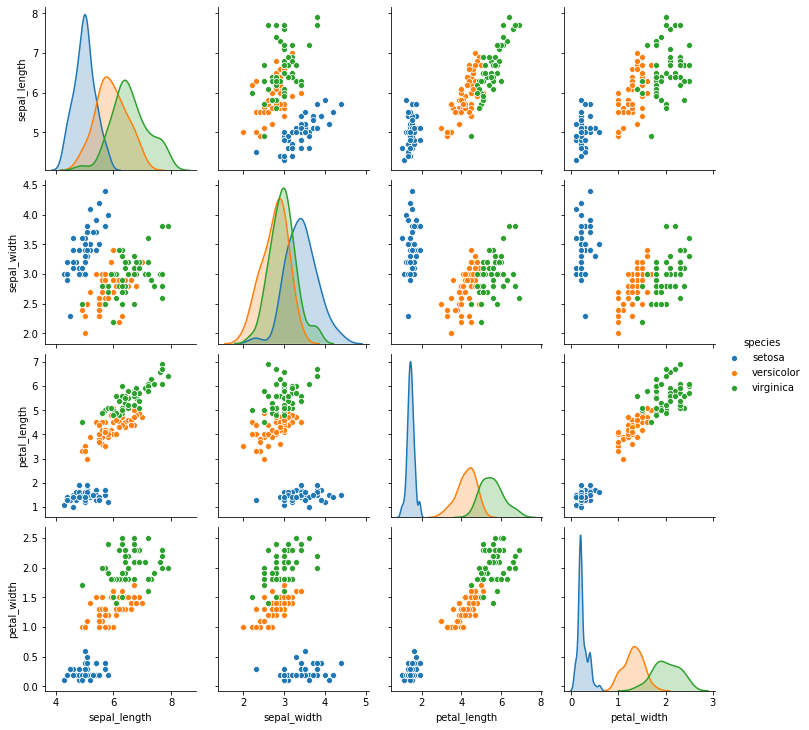

In [6]:
sns.pairplot(iris, hue='species')

**Some observations regarding the sepal and petal sizes of the three species:**
- **Setosa Species:** The length and width of petals in setosa species is smallest amongst all three species, with petal length not exceeding approximately 2 cm, and petal width less than 1.0 cm. The setosa species also has the smallest length of sepal (4 to 6 cm) amongst the three species but has the largest distribution of sepal width ranging from about 3.5 cm to 4.5 cm (excluding outliers).


- **Versicolor Species:** The petal length and width lie in the mid range as compared to the other two species for versicolor species, with petal length between 3 to 5 cm and width between 1 to 2 cm. The sepal length for this species lies between 5 cm to 7 cm and sepal width distributed is 2 to 3.5 cm.


- **Virginica Species:** The virginica species has the largest petals, amongst the three species, with petal length greater than 4 cm upto 7 cm, and petal width lying between 1 to 2.7 cm. The sepal length for this species lies between 5 to 8 cm, which is the largest amongst the three species and the sepal width for this species lies between 2 to 4 cm.

Let's take a look at the correlation between the various features of these flowers:

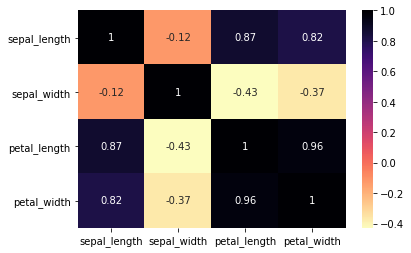

In [7]:
sns.heatmap(iris.corr(), cmap='magma_r', annot=True)
plt.show()

Clearly, the petal length and petal width features have the strongest positive correlation in all three species. And sepal length also is positively correlated to petal length and petal width. However, sepal width has a negative correlation with all other features

Let's take a look at which two features have strongest correlation in the three features individually

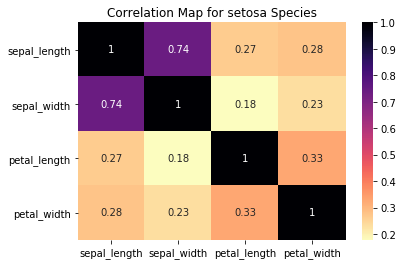

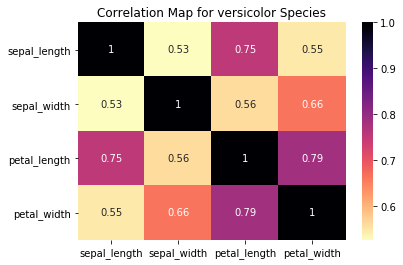

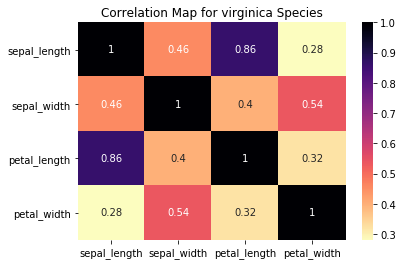

In [8]:
sns.heatmap(iris[iris['species']=='setosa'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for setosa Species')
plt.show()

sns.heatmap(iris[iris['species']=='versicolor'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for versicolor Species')
plt.show()

sns.heatmap(iris[iris['species']=='virginica'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for virginica Species')
plt.show()

 - In setosa species, maximum correlation can be seen between sepal length and sepal width.
 
 - In veriscolor species petal length and petal width have maximum postive corrrelation, followed by petal length and sepal length.
 
 - In virginica species, there is maximum positive correlation between the lengths of petal and sepal.
 
 
 Now, let us prepare our data and build a classification model using Decision Tree Algorithm from skit-learn library to make predictions.

## Preparing the Data

We firstly divide the data into attributes (inputs) which will be denoted by **X**, and labels (outputs) which will be denoted by **y**, and then split our data into training and testing data using scikit learn library on 75%-25% basis. Here, we will use the number of hours studied to predict the percentage scores of the student.

In [9]:
X = iris.drop('species', axis=1)
y = iris['species']

In [10]:
# importing the required function and splitting our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training the model

Now that we have our training and testing data, we proceed to train our model. We import the required functions and train our model.

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
# fitting our model to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predictions = dtree.predict(X_test)

## Evaluating the model

In [15]:
# importing the evaluation metrics for classification model
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print('Classification Report of the Model is as follows:\n')
print(classification_report(y_test, predictions))
print()
print('Confusion matrix: \n')
print(confusion_matrix(y_test, predictions))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion matrix: 

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


The model has correctly classified all the data from the test data!

## Visualizing the Decision tree

Scikit learn has some built-in visualization capabilities for decision trees. We will use these to visualize our Decision Tree model

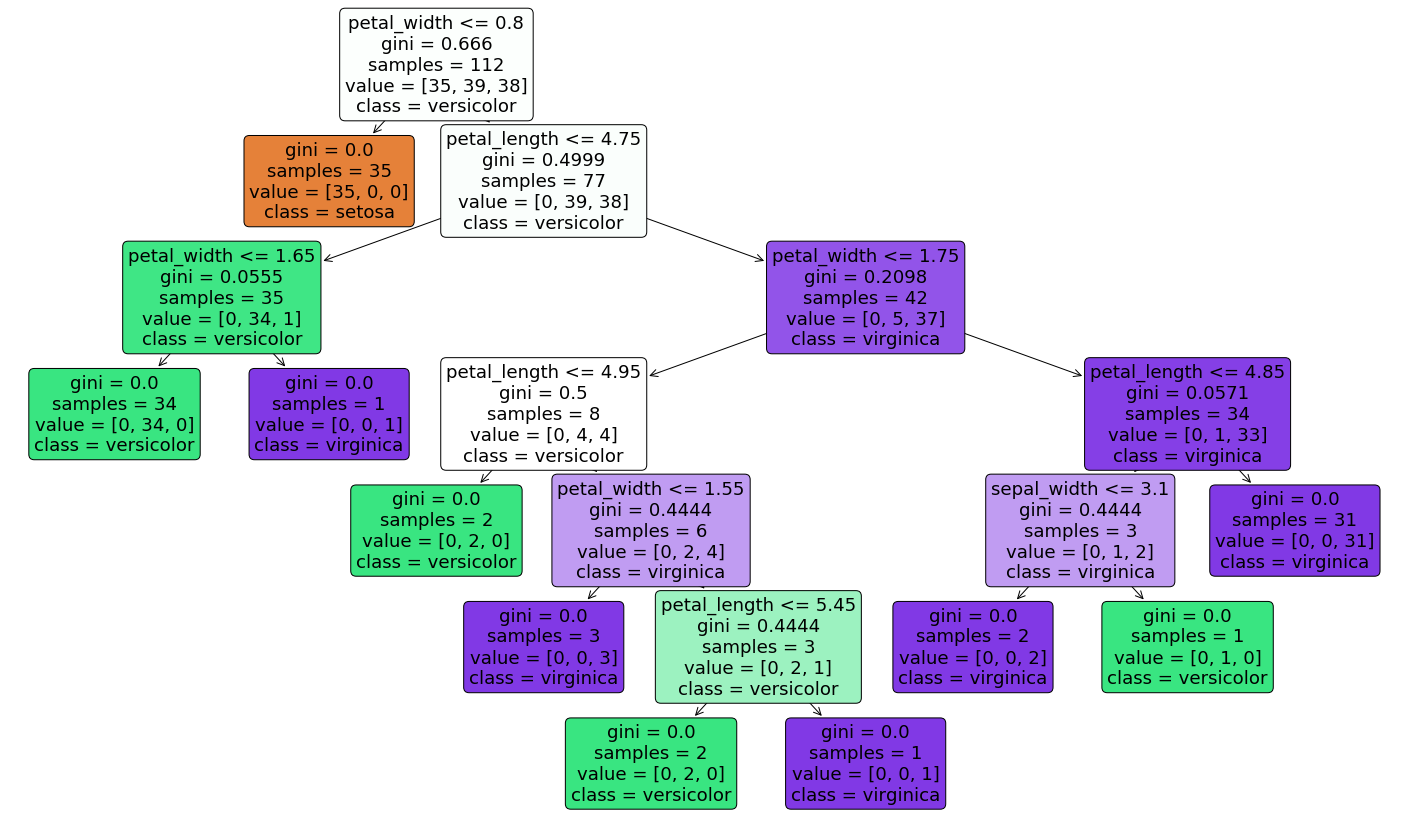

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))

tree_image = plot_tree(dtree,feature_names=iris.columns[:-1],class_names=iris['species'].unique().tolist(),
                       precision=4,label="all",filled=True,rounded=True)
plt.savefig('showTree')

**We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**